In [3]:
from random import gauss 
import matplotlib.pyplot as plt
import numpy as np 
from arch import arch_model 
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf 

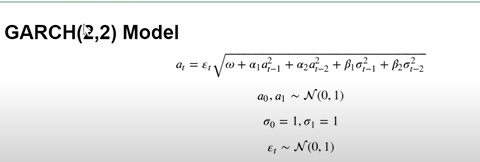

In [5]:
# create dataset 

n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n * 0.1)

series = [gauss(0,1) , gauss(0,1)]
vols = [1,1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1)* new_vol 
    
    vols.append(new_vol)
    series.append(new_val)


Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

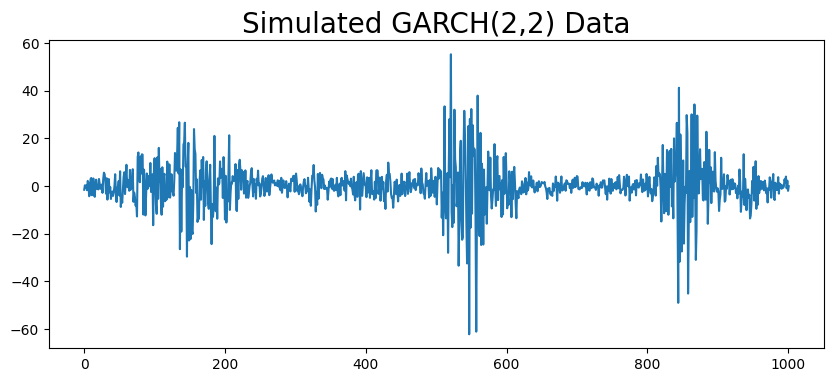

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data' , fontsize = 20)

Text(0.5, 1.0, 'Data Volatility')

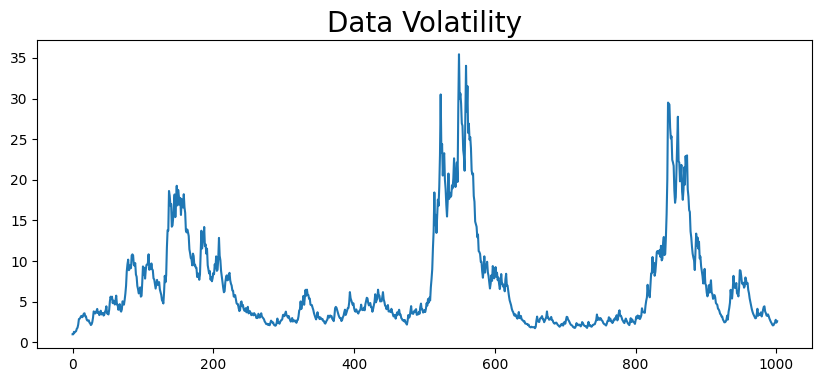

In [7]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility' , fontsize = 20)

Text(0.5, 1.0, 'Data and Volatility')

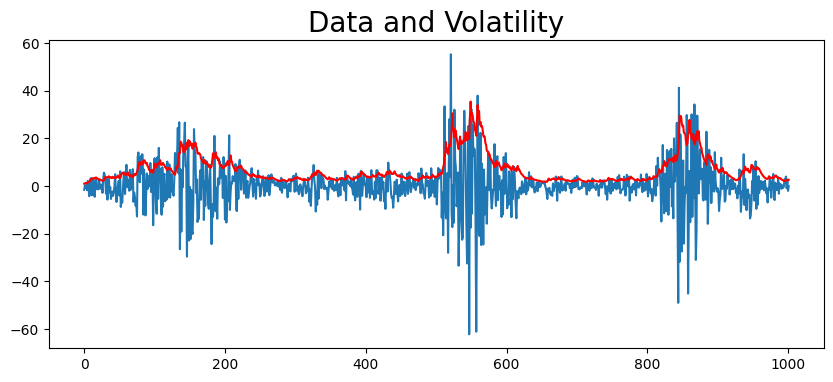

In [9]:
plt.figure(figsize = (10,4))
plt.plot(series)
plt.plot(vols, color = 'red')
plt.title('Data and Volatility' , fontsize = 20)

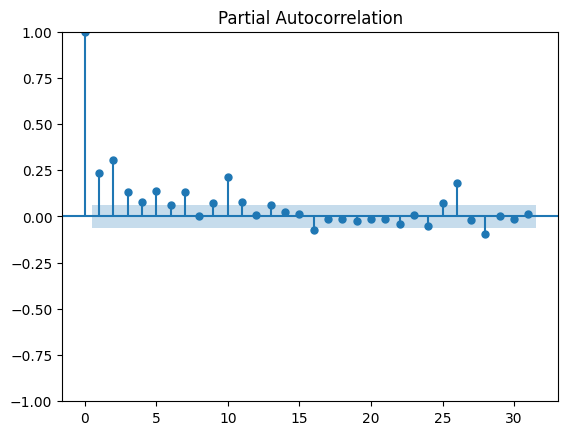

In [10]:
plot_pacf(np.array(series)**2)
plt.show()

# Fitting the GARCH Model 

In [12]:
train , test = series[: - test_size], series[- test_size:]

In [13]:
model = arch_model(train , p=2 , q = 2)

In [14]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1885977692.5268533
Iteration:      2,   Func. Count:     17,   Neg. LLF: 564579.4592622502
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3769.734358006671
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2877.11061432749
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2815.7427979888826
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2829.9774883111704
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2816.3797602756804
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2815.1989485922686
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2798.0168670422054
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2797.922257019456
Iteration:     11,   Func. Count:     87,   Neg. LLF: 2797.994407553111
Iteration:     12,   Func. Count:     95,   Neg. LLF: 2797.906517803848
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2797.9060755704286
Iteration:     14,   Func. Count:    109,   Neg. LLF: 2797

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2797.91
Distribution:                  Normal   AIC:                           5607.81
Method:            Maximum Likelihood   BIC:                           5636.64
                                        No. Observations:                  902
Date:                Tue, Jul 09 2024   Df Residuals:                      901
Time:                        17:37:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0746      0.111      0.672      0.502 [ -0.143,  0.292]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.5689      0.221      2.575  1.004e-02      [  0.136,  1.002]
alpha[1]       0.0346  3.014e-02      1.149      0.251 [-2.446e-02,9.370e-02]
alpha[2]       0.2800  4.302e-02      6.508  7.624e-11      [  0.196,  0.364]
beta[1]        0.2913  9.362e-02      3.111  1.862e-03      [  0.108,  0.475]
beta[2]        0.3941  8.159e-02      4.830  1.365e-06      [  0.234,  0.554]
=============================================================================

Covariance estimator: robust
"""

# Predict 

In [16]:
predictions = model_fit.forecast(horizon=test_size)

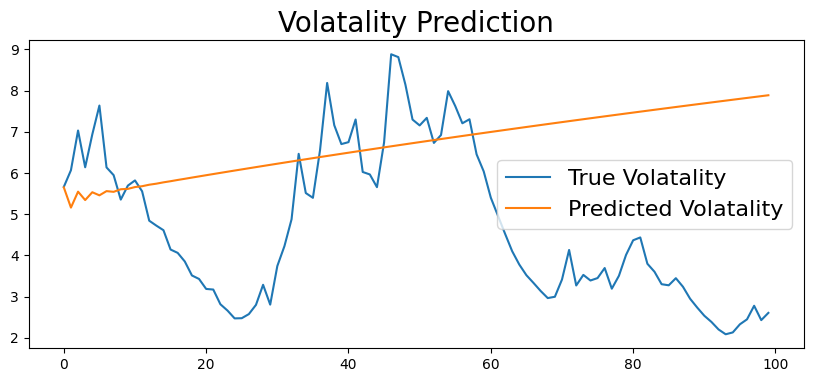

In [20]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))

plt.title('Volatality Prediction' , fontsize = 20)
plt.legend(['True Volatality' , 'Predicted Volatality'] , fontsize = 16)

In [21]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size - i)]
    model = arch_model(train , p =2 , q =2)
    model_fit = model.fit(disp= 'off')
    pred = model_fit.forecast(horizon = 1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1 , :][0]))

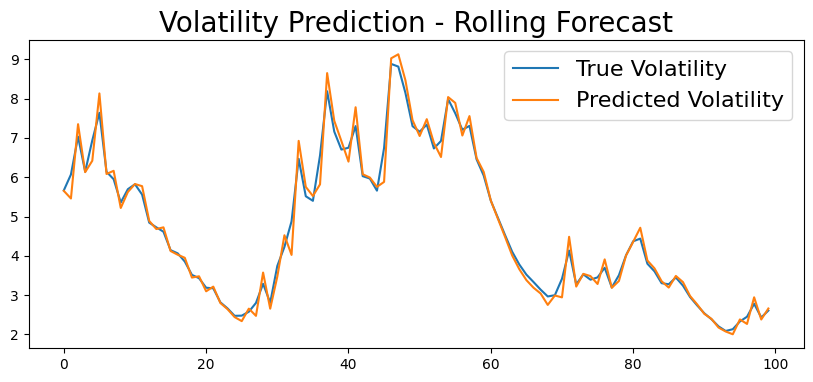

In [23]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast' , fontsize = 20)
plt.legend(['True Volatility ' , 'Predicted Volatility'] , fontsize = 16)